# **What is Cross Validation?**

Cross Validation (CV) is a model evaluation technique used to check how well a machine learning model will perform on unseen data.

**The core idea:**

Instead of training a model on all the available data and then testing it on just one test set, CV uses multiple train-test splits to get a more reliable estimate of performance.

Why do we need it?

* A single train-test split might give lucky or unlucky results (high variance) depending on how the data was split.

* In small datasets, holding out a large chunk for testing wastes precious data.

* Cross validation reduces bias (by testing on different data portions) and variance (by averaging results).

**Analogy:**
Imagine you’re judging a chef’s cooking skills. If you taste just one dish, your opinion might be biased (maybe that one was exceptionally good or bad).
If you taste several dishes on different days, you’ll get a more accurate overall impression.

# **K-Fold Cross Validation**

**Definition:**
In K-Fold Cross Validation, the dataset is split into K equal-sized parts (folds).
The model is trained K times, each time using:

* K–1 folds for training

* 1 fold for testing (a different fold each time)

### **Process step-by-step:**

1. Shuffle the dataset (to ensure randomness).

2. Split the data into K folds of roughly equal size.

3. For each i-th fold (where i = 1 to K):

  * Use fold i as the test set

  * Use all remaining folds as the training set

  * Train the model and evaluate on the test set.

4. Average the K performance scores → final performance estimate.


**Advantages:**

* More reliable performance estimate than a single train-test split.

* Efficient use of data (each point is used for both training and testing).

* Works well even for small datasets.

**Disadvantages:**

* Higher computational cost (model trained K times).

* If K is too small → high variance; if too large (like leave-one-out CV) → very high computation & potential overfitting.

**Typical choices of K:**

* K = 5 or 10 are common defaults.

* Small datasets → larger K (e.g., K=10) to keep training sets big.

* Large datasets → smaller K (e.g., K=5) to save computation time.

# **Coding (On California Housing Dataset)**

In [ ]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
housing = fetch_california_housing(as_frame=True)
df = housing.frame


In [ ]:
df.head()
#target feature: "MedHouseVal" (It is a regression problem)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
print("Dataset shape:", df.shape)

Dataset shape: (20640, 9)


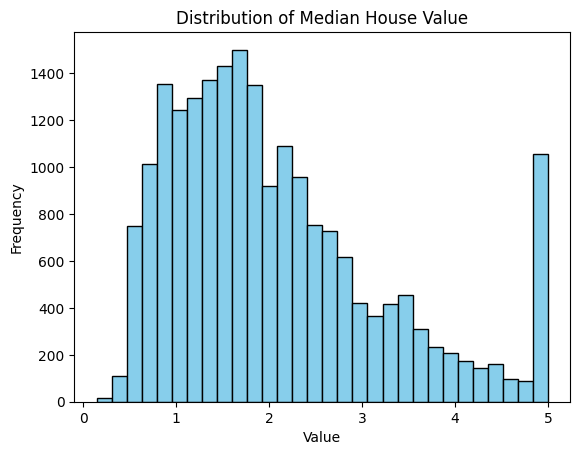

In [ ]:
# Quick histogram of target variable
plt.hist(df["MedHouseVal"], bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of Median House Value")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

In [ ]:
# Features and target
X = df.drop("MedHouseVal", axis=1)
y = df["MedHouseVal"]

In [ ]:
# Define K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
model = LinearRegression()

In [ ]:
# Store results for each fold
mse_scores = []
r2_scores = []

In [ ]:
for fold, (train_idx, test_idx) in enumerate(kf.split(X), start=1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Train
    model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_test)

    # Evaluate
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    mse_scores.append(mse)
    r2_scores.append(r2)

    print(f"Fold {fold}: MSE = {mse:.4f}, R² = {r2:.4f}")

Fold 1: MSE = 0.5559, R² = 0.5758
Fold 2: MSE = 0.5277, R² = 0.6137
Fold 3: MSE = 0.5093, R² = 0.6086
Fold 4: MSE = 0.5049, R² = 0.6213
Fold 5: MSE = 0.5552, R² = 0.5875


In [ ]:
# Average results
print("\nAverage MSE:", np.mean(mse_scores))
print("Average R²:", np.mean(r2_scores))


Average MSE: 0.5305724639238882
Average R²: 0.6013781013684618


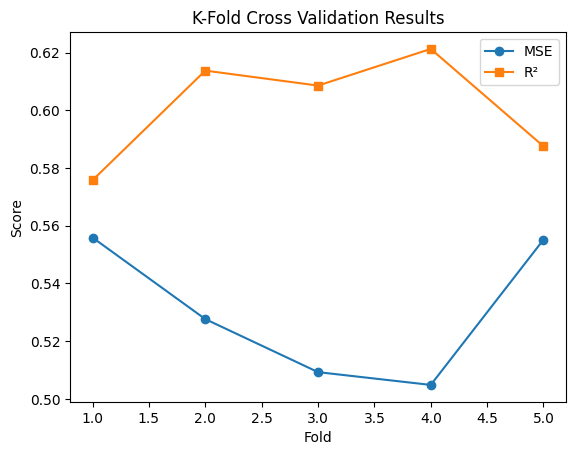

In [ ]:
# Visualization of fold results
plt.plot(range(1, kf.get_n_splits() + 1), mse_scores, marker='o', label='MSE')
plt.plot(range(1, kf.get_n_splits() + 1), r2_scores, marker='s', label='R²')
plt.title("K-Fold Cross Validation Results")
plt.xlabel("Fold")
plt.ylabel("Score")
plt.legend()
plt.show()

# **Coding (On Wine Dataset)**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

In [ ]:
wine = load_wine()
X = wine.data
y = wine.target
feature_names = wine.feature_names
target_names = wine.target_names
print("Feature Names:", feature_names)
print("Target Classes:", target_names)

Feature Names: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Target Classes: ['class_0' 'class_1' 'class_2']


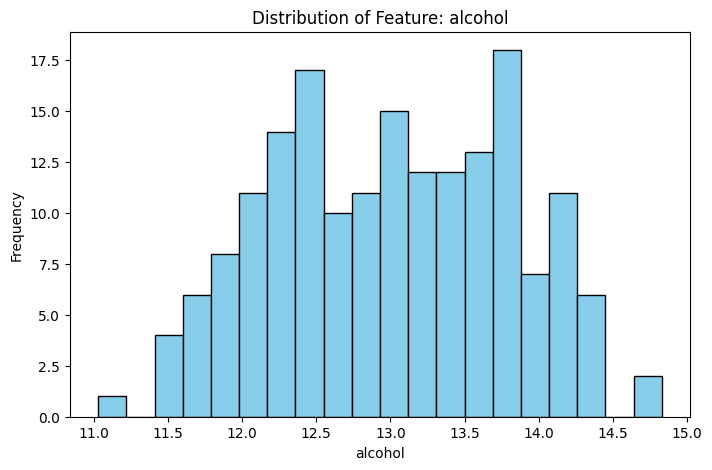

In [ ]:
plt.figure(figsize=(8, 5))
plt.hist(X[:, 0], bins=20, color='skyblue', edgecolor='black')
plt.title(f"Distribution of Feature: {feature_names[0]}")
plt.xlabel(feature_names[0])
plt.ylabel("Frequency")
plt.show()

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
model = LogisticRegression(max_iter=1000)

In [ ]:
fold = 1
accuracies = []
conf_matrices = []

In [ ]:
for train_index, test_index in kf.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train model
    model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_test)

    # Accuracy
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

    # Confusion matrix
    conf_matrices.append(confusion_matrix(y_test, y_pred))

    print(f"Fold {fold} Accuracy: {acc:.4f}")
    fold += 1

Fold 1 Accuracy: 1.0000
Fold 2 Accuracy: 0.9722
Fold 3 Accuracy: 1.0000
Fold 4 Accuracy: 0.9714
Fold 5 Accuracy: 1.0000


In [ ]:
print(f"\nAverage Accuracy: {np.mean(accuracies):.4f}")


Average Accuracy: 0.9887


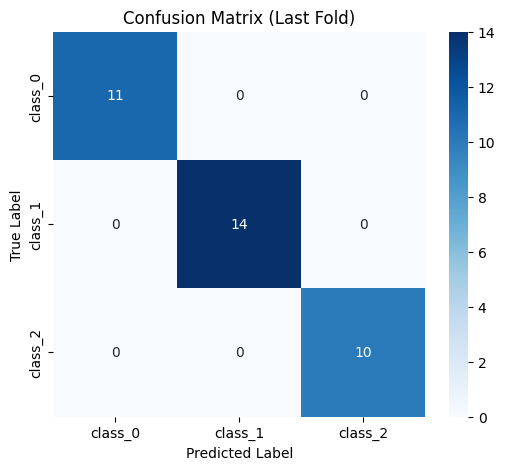

In [ ]:
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrices[-1], annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names, yticklabels=target_names)
plt.title("Confusion Matrix (Last Fold)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
print("\nClassification Report (Last Fold):\n")
print(classification_report(y_test, y_pred, target_names=target_names))


Classification Report (Last Fold):

              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        11
     class_1       1.00      1.00      1.00        14
     class_2       1.00      1.00      1.00        10

    accuracy                           1.00        35
   macro avg       1.00      1.00      1.00        35
weighted avg       1.00      1.00      1.00        35

